# SNCosmo Models

Load and plot the built-in models available in the [sncosmo](https://sncosmo.readthedocs.io/en/v2.0.x/index.html) package.

In [1]:
import sncosmo
from sncosmo.models import _SOURCES

from astropy.table import Table

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from cycler import cycler

## List SNCosmo Built-in Models

In [2]:
types = []
names = []
subcl = []
paper = []
tmin, tmax = [], []
wlmin, wlmax = [], []

for m in _SOURCES.get_loaders_metadata():
    typ = m['type']
    name = m['name']
    sc = m['subclass']
    if name in names:
        continue
    names.append(name)
    types.append(typ)
    subcl.append(sc)
    tmin.append(0.)
    tmax.append(0.)
    wlmin.append(0.)
    wlmax.append(0.)
    
    ref = m['reference'] if 'reference' in m.keys() else ''
    paper.append(ref)
source_tab = Table([types, names, tmin, tmax, wlmin, wlmax, subcl, paper],
                   names=('type', 'model', 'tmin', 'tmax', 'wlmin', 'wlmax', 'subclass', 'reference'),
                   meta={'name':'SNCosmo Models'})

np.unique(source_tab['type'])

<Column name='type' dtype='str9' length=10>
   PopIII
SN II-pec
   SN IIL
 SN IIL/P
   SN IIP
   SN IIn
    SN Ia
    SN Ib
  SN Ib/c
    SN Ic

In [3]:
def plot_model(modelname, modeltype):
    """Plot the SNCosmo model SEDs and light curve for daily epochs.
    
    Parameters
    ----------
    modelname : str
        Name of SNCosmo model.
    modeltype : str
        Supernova type.
        
    Returns
    -------
    fig : matplotlib.figure.Figure
        Figure object for plotting/saving.
    """
    model = sncosmo.Model(modelname)
    wl = np.arange(np.ceil(model.minwave()), np.floor(model.maxwave()), 1)
    times = np.arange(np.ceil(model.mintime()), np.floor(model.maxtime())+1, 1)

    colors = mpl.cm.plasma(np.linspace(0.1, 0.9, len(times)))
    mpl.rc('axes', prop_cycle=cycler('color', colors))

    fig, axes = plt.subplots(1,2, figsize=(10,4))
    ax1, ax2 = axes

    # Plot the SED
    for t in times:
        label = None
        lw = 1
        ls = ':'
        if t==times[0] or t==times[-1] or t==0:
            label = '{:d}d'.format(int(t))
            lw = 3
            ls = '-'

        try:
            ax1.plot(wl, model.flux(t, wl), alpha=0.7, label=label, lw=lw, ls=ls)
        except:
            return None

    ax1.set(title='{} ({})'.format(modelname, modeltype),
           xlabel=r'wavelength [$\AA$]',
           xlim=(wl[0], wl[-1]),
           ylabel=r'flux [erg cm$^{-2}$ s$^{-1}$ $\AA^{-1}$')

    ax1.legend(fontsize=10, loc='upper right')
    
    # Plot the light curve in several bands.
    colors = mpl.cm.rainbow(np.linspace(0, 1, len('ugrizy')))
    ax2.set_prop_cycle('color', colors)

    print(modelname)
    minmag = 1e99
    for band in 'ugrizy':
        try:
            mag = [model.bandmag('lsst{}'.format(band), 'ab', t) for t in times]
            mag = np.ma.masked_invalid(mag)
            ax2.plot(times, mag, '.', alpha=0.9, label=band)
            minmag = np.minimum(minmag, np.min(mag))
            print('{}: tmax = {}d'.format(band, times[np.argmin(mag)]))
        except ValueError as e:
            ax2.plot(times, np.zeros_like(times)-99, '.', label=band)

    print('minmag = {:g}\n'.format(minmag))

    try:
        ax2.set(xlabel=r'time [day]',
                ylim=(minmag + 10, minmag-1),
                ylabel=r'$m_\mathrm{AB}$')
    except:
        pass

    ax2.legend(loc='lower center', ncol=3)

    fig.tight_layout()
    
    return fig

## SN Ia Models

nugent-sn1a
u: tmax = 17.0d
g: tmax = 20.0d
r: tmax = 23.0d
i: tmax = 17.0d
z: tmax = 18.0d
y: tmax = 50.0d
minmag = 0.00220186

nugent-sn91t
u: tmax = 20.0d
g: tmax = 24.0d
r: tmax = 27.0d
i: tmax = 26.0d
z: tmax = 54.0d
y: tmax = 45.0d
minmag = -0.0738247

nugent-sn91bg
u: tmax = 12.0d
g: tmax = 14.0d
r: tmax = 15.0d
i: tmax = 16.0d
z: tmax = 15.0d
y: tmax = 22.0d
minmag = -0.0461841



/Users/sybenzvi/anaconda3/envs/desi/lib/python3.7/site-packages/sncosmo/models.py:186: RuntimeWarning: invalid value encountered in log10
  result[i] = -2.5 * np.log10(f / zpf)


hsiao
u: tmax = -2.0d
g: tmax = 1.0d
r: tmax = 2.0d
i: tmax = -2.0d
z: tmax = 0.0d
y: tmax = -3.0d
minmag = -0.0294671

hsiao-subsampled
u: tmax = -2.0d
g: tmax = 1.0d
r: tmax = 2.0d
i: tmax = -2.0d
z: tmax = -1.0d
y: tmax = -3.0d
minmag = -0.0268358

salt2
u: tmax = -2.0d
g: tmax = 0.0d
r: tmax = 1.0d
i: tmax = -4.0d
minmag = 10.5729



/Users/sybenzvi/anaconda3/envs/desi/lib/python3.7/site-packages/sncosmo/models.py:186: RuntimeWarning: divide by zero encountered in log10
  result[i] = -2.5 * np.log10(f / zpf)


salt2-extended
u: tmax = -2.0d
g: tmax = 0.0d
r: tmax = 1.0d
i: tmax = -4.0d
z: tmax = -1.0d
y: tmax = -5.0d
minmag = 10.5729

salt2-extended-h17
u: tmax = -2.0d
g: tmax = 0.0d
r: tmax = 1.0d
i: tmax = -4.0d
z: tmax = -1.0d
y: tmax = -5.0d
minmag = 10.5729

snf-2011fe
g: tmax = -2.0d
r: tmax = 2.0d
i: tmax = -3.0d
z: tmax = -3.0d
minmag = 9.88865



/Users/sybenzvi/anaconda3/envs/desi/lib/python3.7/site-packages/sncosmo/models.py:186: RuntimeWarning: invalid value encountered in log10
  result[i] = -2.5 * np.log10(f / zpf)


snemo2
g: tmax = 0.0d
r: tmax = 1.0d
i: tmax = -3.0d
minmag = -22.1363



/Users/sybenzvi/anaconda3/envs/desi/lib/python3.7/site-packages/sncosmo/models.py:186: RuntimeWarning: divide by zero encountered in log10
  result[i] = -2.5 * np.log10(f / zpf)


snemo7
g: tmax = 0.0d
r: tmax = 2.0d
i: tmax = -3.0d
minmag = -22.1283

snemo15
g: tmax = 0.0d
r: tmax = 1.0d
i: tmax = -3.0d
minmag = -22.1384



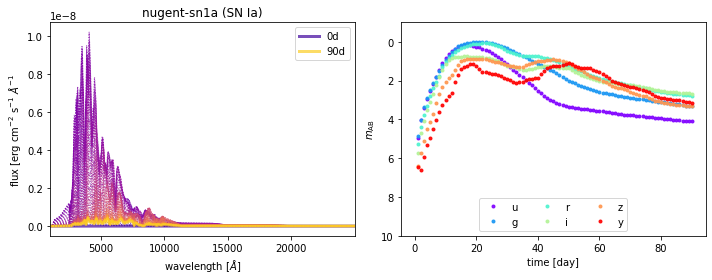

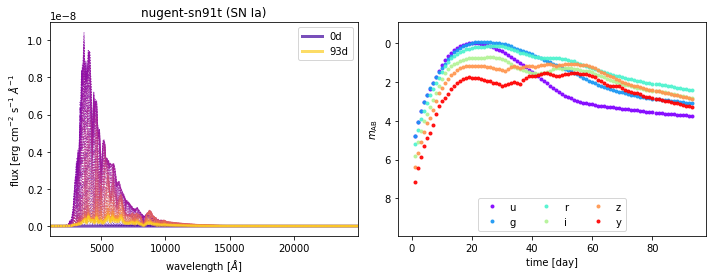

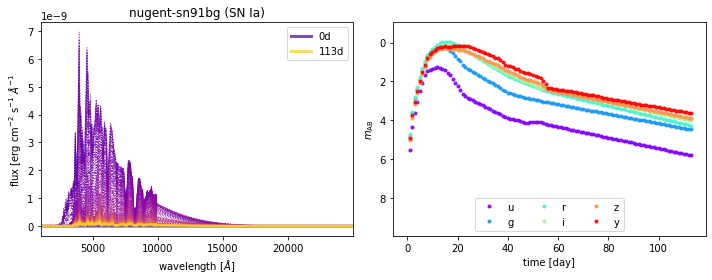

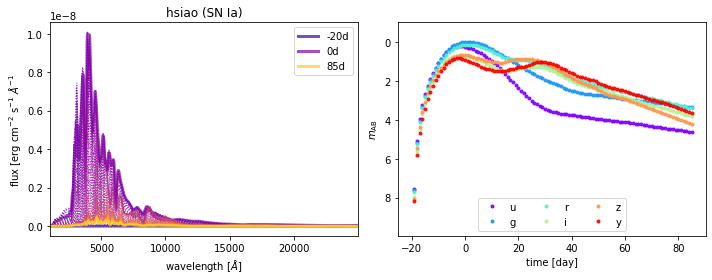

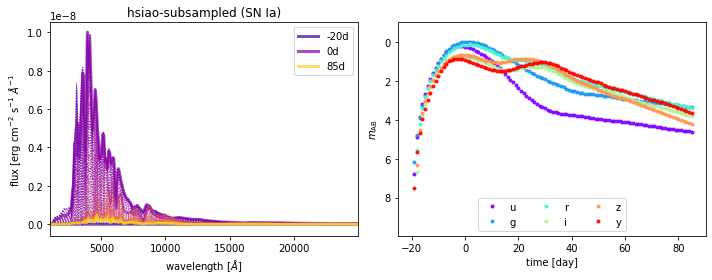

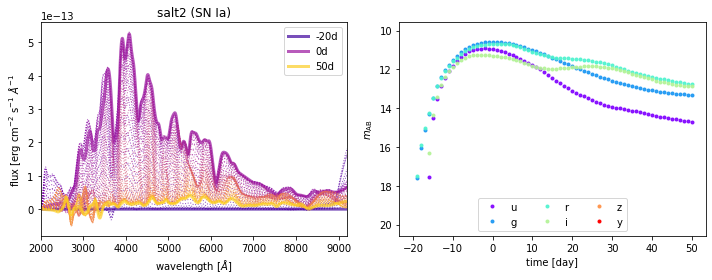

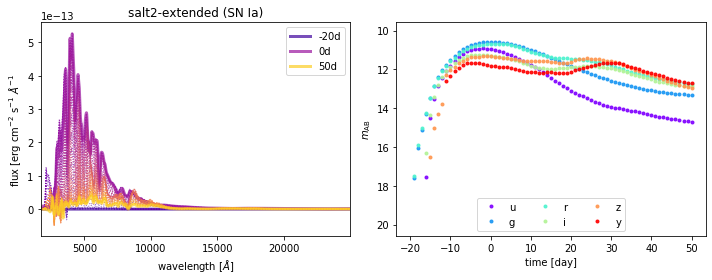

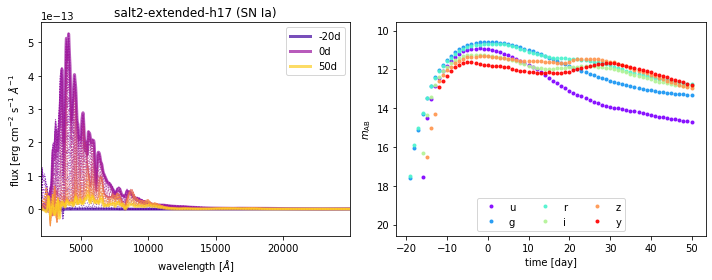

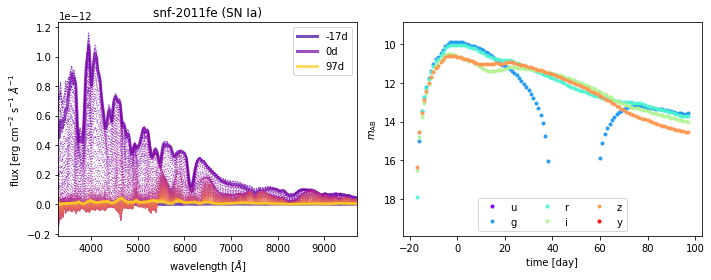

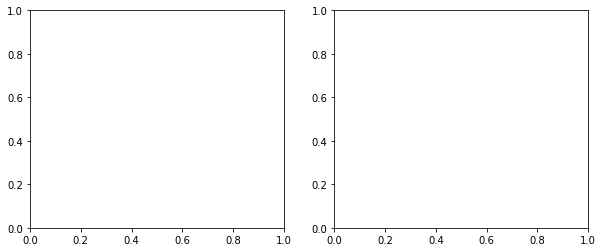

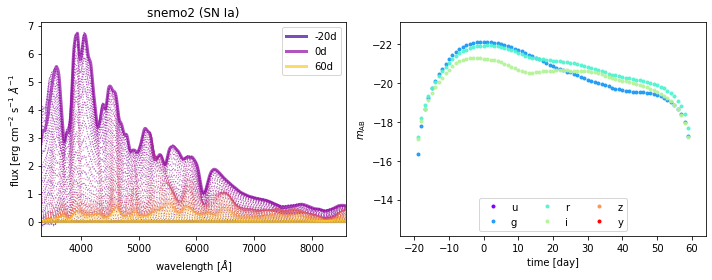

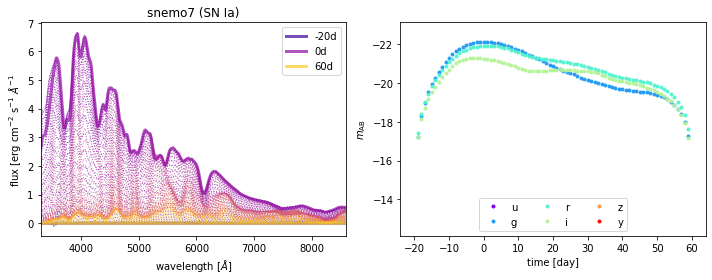

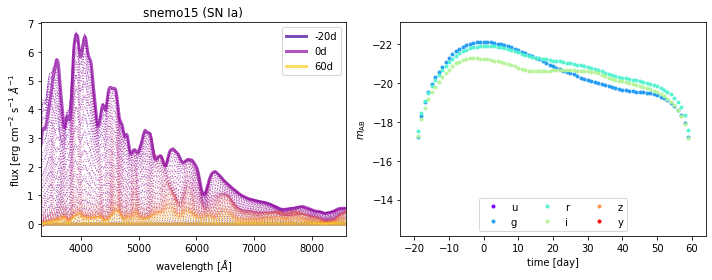

In [4]:
mask = source_tab['type'] == 'SN Ia'
models = source_tab[mask]['model']

for m in models:
    model = sncosmo.Model(m)
    row = np.argwhere(source_tab['model'] == m)[0,0]
    source_tab[row]['tmin'] = model.mintime()
    source_tab[row]['tmax'] = model.maxtime()
    source_tab[row]['wlmin'] = model.minwave()
    source_tab[row]['wlmax'] = model.maxwave()
    fig = plot_model(m, 'SN Ia')

## SN Ib Models

s11-2005hl
u: tmax = -15.0d
g: tmax = -9.0d
r: tmax = -4.0d
i: tmax = -2.0d
z: tmax = 4.0d
y: tmax = 1.0d
minmag = -17.1387

s11-2005hm
u: tmax = 2.0d
g: tmax = 3.0d
r: tmax = 7.0d
i: tmax = 12.0d
z: tmax = 9.0d
y: tmax = 9.0d
minmag = -16.876

s11-2006jo
u: tmax = -15.0d
g: tmax = -11.0d
r: tmax = -7.0d
i: tmax = -8.0d
z: tmax = -7.0d
y: tmax = -6.0d
minmag = -18.4966

snana-2004gv
u: tmax = -1.0d
g: tmax = 1.0d
r: tmax = 6.0d
i: tmax = 6.0d
z: tmax = 5.0d
y: tmax = 7.0d
minmag = -18.2892

snana-2006ep
u: tmax = 0.0d
g: tmax = 2.0d
r: tmax = 5.0d
i: tmax = 6.0d
z: tmax = 6.0d
y: tmax = 7.0d
minmag = -19.9902

snana-2007y
u: tmax = -2.0d
g: tmax = 0.0d
r: tmax = 2.0d
i: tmax = 4.0d
z: tmax = 4.0d
y: tmax = 3.0d
minmag = -16.4927

snana-2004ib
u: tmax = -1.0d
g: tmax = 1.0d
r: tmax = 4.0d
i: tmax = 5.0d
z: tmax = 8.0d
y: tmax = 4.0d
minmag = -17.5443

snana-2005hm
u: tmax = -3.0d
g: tmax = -1.0d
r: tmax = 3.0d
i: tmax = 4.0d
z: tmax = 2.0d
y: tmax = 5.0d
minmag = -16.8712

snana-2006jo


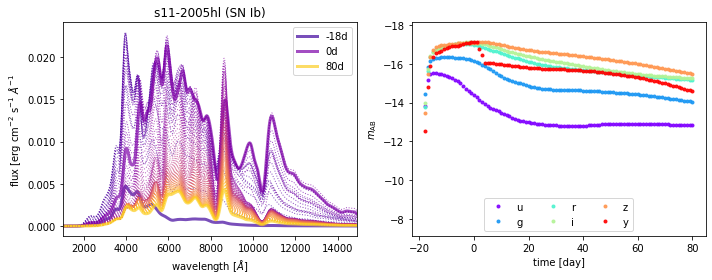

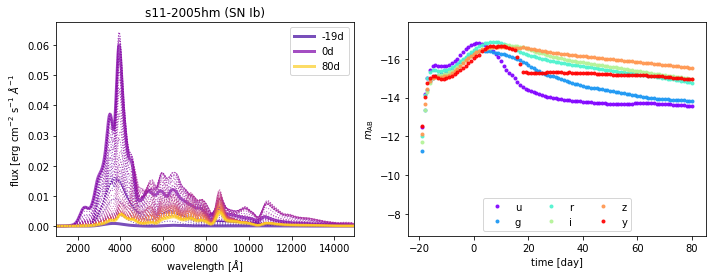

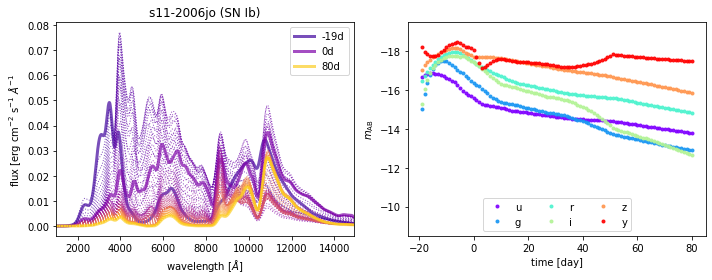

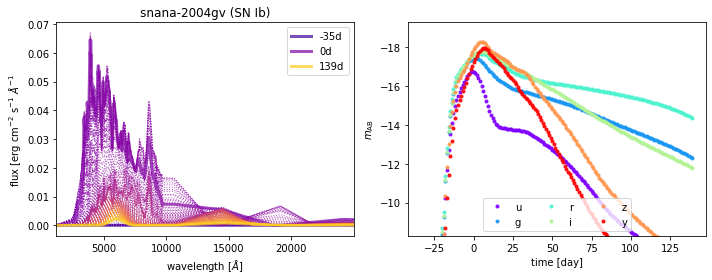

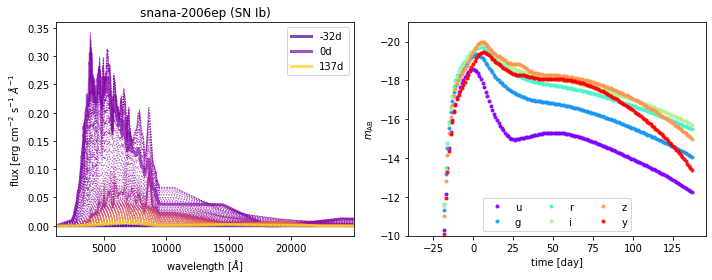

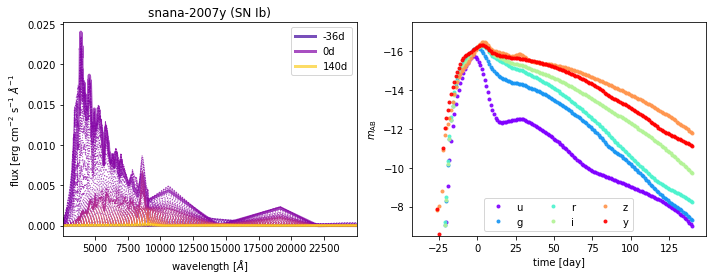

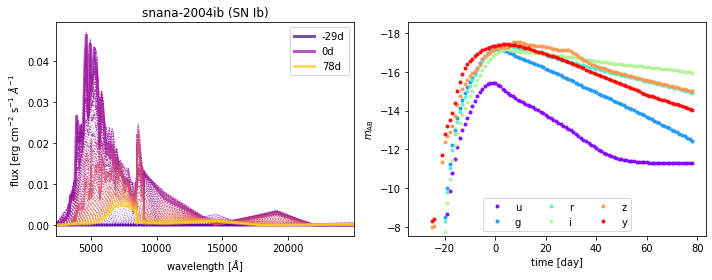

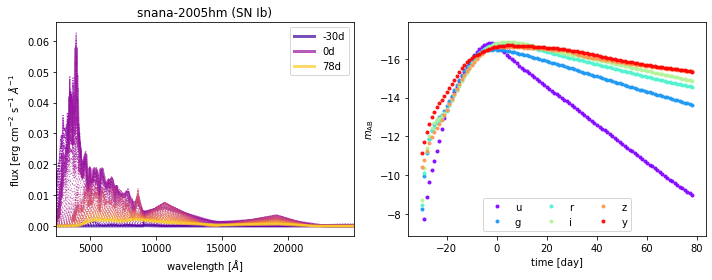

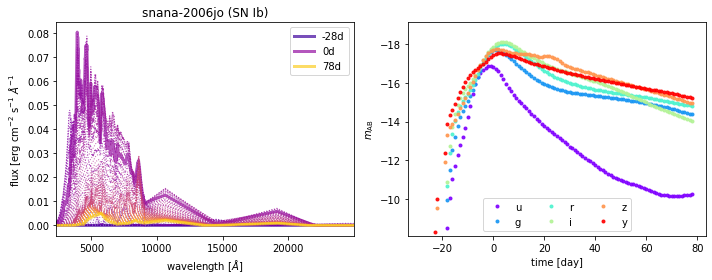

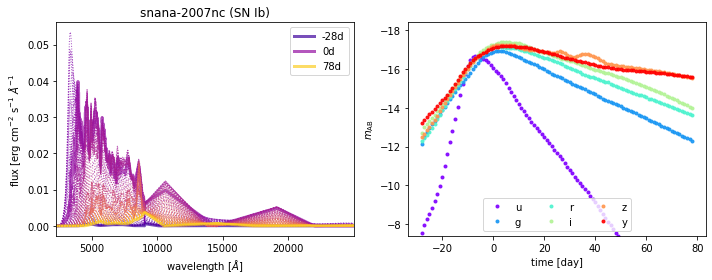

In [5]:
mask = source_tab['type'] == 'SN Ib'
models = source_tab[mask]['model']

for m in models:
    model = sncosmo.Model(m)
    row = np.argwhere(source_tab['model'] == m)[0,0]
    source_tab[row]['tmin'] = model.mintime()
    source_tab[row]['tmax'] = model.maxtime()
    source_tab[row]['wlmin'] = model.minwave()
    source_tab[row]['wlmax'] = model.maxwave()
    fig = plot_model(m, 'SN Ib')

## SN Ib/c Models

nugent-sn1bc
u: tmax = 16.0d
g: tmax = 19.0d
r: tmax = 21.0d
i: tmax = 24.0d
z: tmax = 23.0d
y: tmax = 24.0d
minmag = -0.0193756

nugent-hyper
u: tmax = 16.0d
g: tmax = 16.0d
r: tmax = 17.0d
i: tmax = 16.0d
z: tmax = 16.0d
y: tmax = 17.0d
minmag = 0.114831



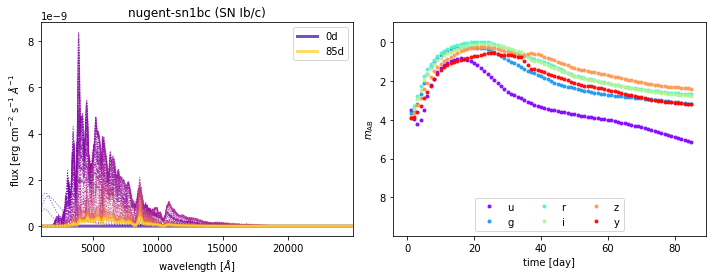

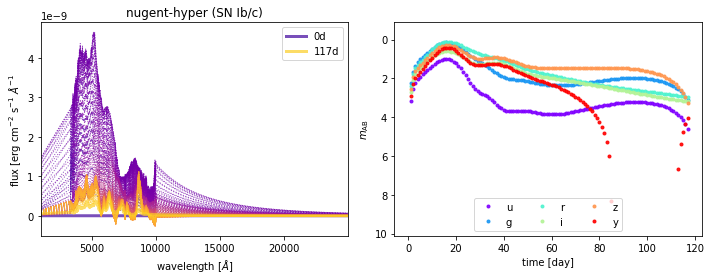

In [6]:
mask = source_tab['type'] == 'SN Ib/c'
models = source_tab[mask]['model']

for m in models:
    model = sncosmo.Model(m)
    row = np.argwhere(source_tab['model'] == m)[0,0]
    source_tab[row]['tmin'] = model.mintime()
    source_tab[row]['tmax'] = model.maxtime()
    source_tab[row]['wlmin'] = model.minwave()
    source_tab[row]['wlmax'] = model.maxwave()
    fig = plot_model(m, 'SN Ib/c')

## SN Ic Models

s11-2006fo
u: tmax = -7.0d
g: tmax = -4.0d
r: tmax = 1.0d
i: tmax = 4.0d
z: tmax = 10.0d
y: tmax = 3.0d
minmag = -17.511

snana-2004fe
u: tmax = -1.0d
g: tmax = 1.0d
r: tmax = 3.0d
i: tmax = 5.0d
z: tmax = 5.0d
y: tmax = 5.0d
minmag = -17.6476

snana-2004gq
u: tmax = -1.0d
g: tmax = 1.0d
r: tmax = 4.0d
i: tmax = 7.0d
z: tmax = 7.0d
y: tmax = 7.0d
minmag = -17.3378

snana-sdss004012
u: tmax = -3.0d
g: tmax = -2.0d
r: tmax = 1.0d
i: tmax = -1.0d
z: tmax = 1.0d
y: tmax = 5.0d
minmag = -17.5704

snana-2006fo
u: tmax = -2.0d
g: tmax = 0.0d
r: tmax = 2.0d
i: tmax = 3.0d
z: tmax = 10.0d
y: tmax = 11.0d
minmag = -17.6353

snana-sdss014475
u: tmax = -3.0d
g: tmax = 0.0d
r: tmax = 2.0d
i: tmax = 2.0d
z: tmax = 14.0d
y: tmax = 10.0d
minmag = -18.4591

snana-2006lc
u: tmax = 1.0d
g: tmax = 0.0d
r: tmax = 0.0d
i: tmax = 5.0d
z: tmax = 3.0d
y: tmax = 7.0d
minmag = -17.0732

snana-04d1la
u: tmax = 0.0d
g: tmax = 3.0d
r: tmax = 10.0d
i: tmax = 12.0d
z: tmax = 52.0d
y: tmax = 11.0d
minmag = -17.5447

s

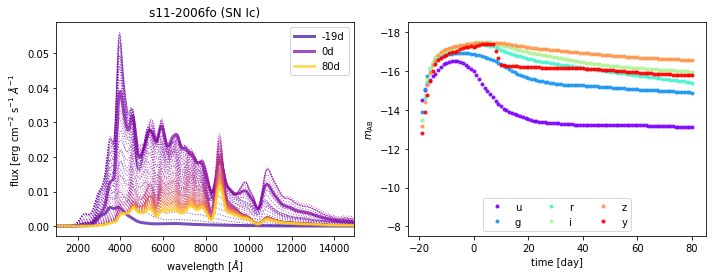

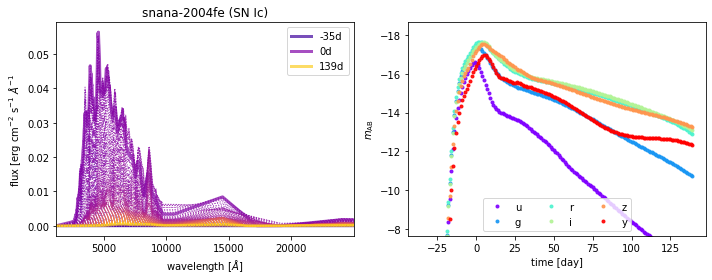

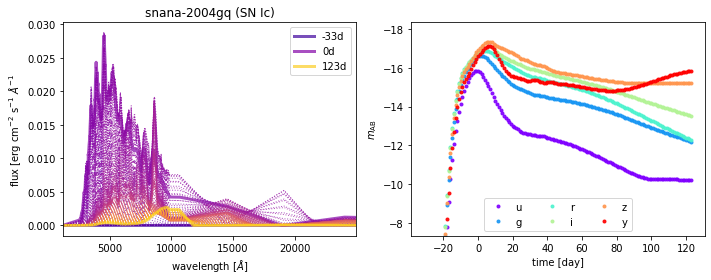

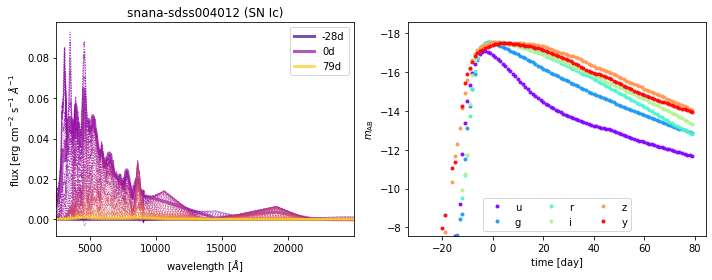

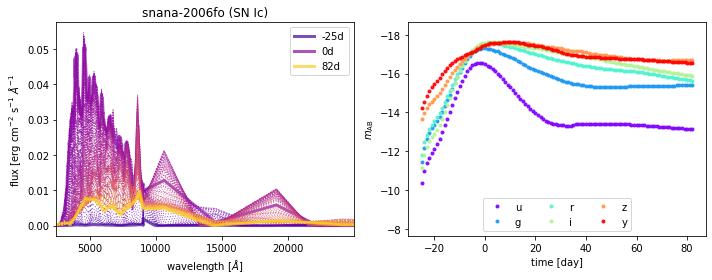

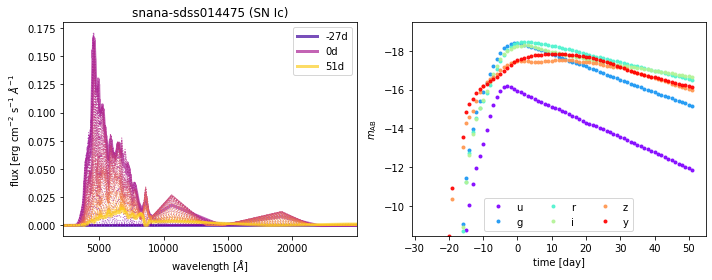

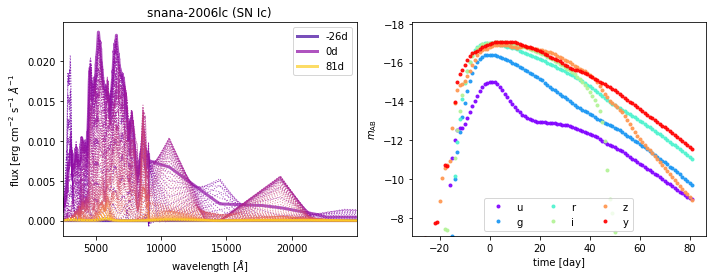

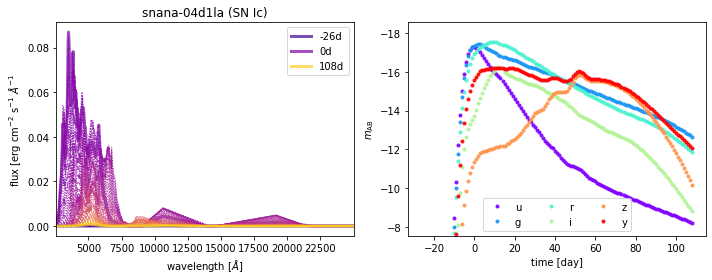

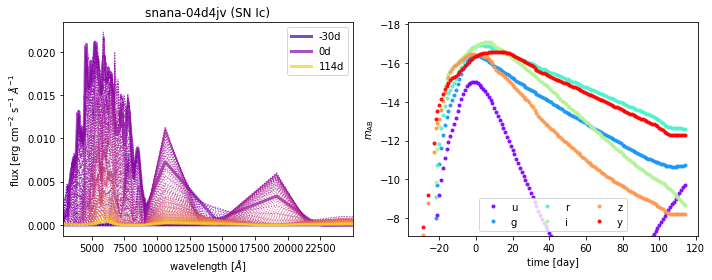

In [7]:
mask = source_tab['type'] == 'SN Ic'
models = source_tab[mask]['model']

for m in models:
    model = sncosmo.Model(m)
    row = np.argwhere(source_tab['model'] == m)[0,0]
    source_tab[row]['tmin'] = model.mintime()
    source_tab[row]['tmax'] = model.maxtime()
    source_tab[row]['wlmin'] = model.minwave()
    source_tab[row]['wlmax'] = model.maxwave()
    fig = plot_model(m, 'SN Ic')

## SN IIn Models

nugent-sn2n
u: tmax = 13.0d
g: tmax = 17.0d
r: tmax = 20.0d
i: tmax = 21.0d
z: tmax = 22.0d
y: tmax = 22.0d
minmag = -0.239365

snana-2006ez
u: tmax = 0.0d
g: tmax = 3.0d
r: tmax = 4.0d
i: tmax = 3.0d
z: tmax = 22.0d
y: tmax = 23.0d
minmag = -18.8784

snana-2006ix
u: tmax = 3.0d
g: tmax = 0.0d
r: tmax = 7.0d
i: tmax = 11.0d
z: tmax = 11.0d
y: tmax = 79.0d
minmag = -18.2924



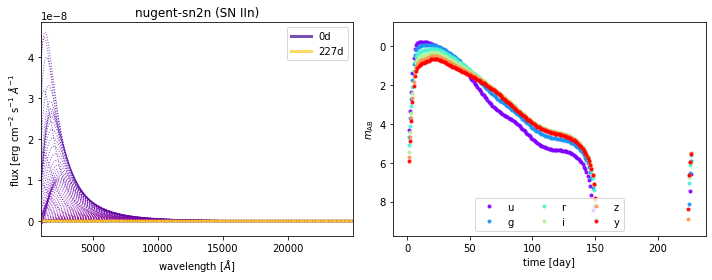

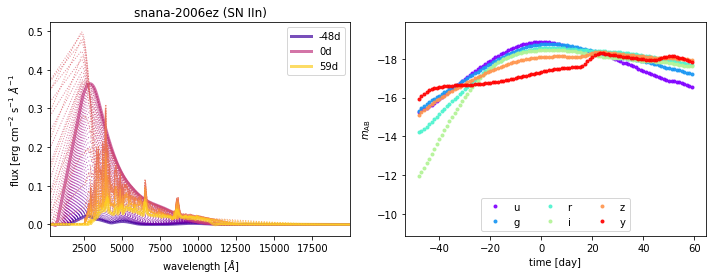

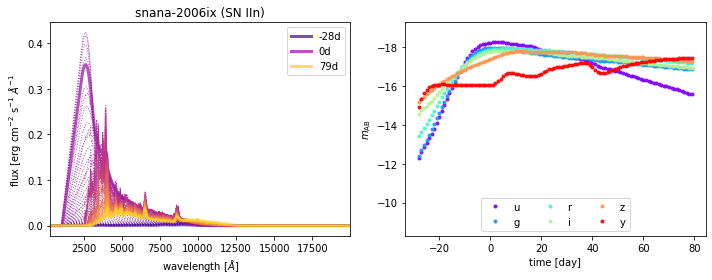

In [8]:
mask = source_tab['type'] == 'SN IIn'
models = source_tab[mask]['model']

for m in models:
    model = sncosmo.Model(m)
    row = np.argwhere(source_tab['model'] == m)[0,0]
    source_tab[row]['tmin'] = model.mintime()
    source_tab[row]['tmax'] = model.maxtime()
    source_tab[row]['wlmin'] = model.minwave()
    source_tab[row]['wlmax'] = model.maxwave()
    fig = plot_model(m, 'SN IIn')

## SN IIP Models

nugent-sn2p
u: tmax = 11.0d
g: tmax = 12.0d
r: tmax = 318.0d
i: tmax = 317.0d
z: tmax = 317.0d
y: tmax = 317.0d
minmag = -2.03697

s11-2005lc
u: tmax = -11.0d
g: tmax = -10.0d
r: tmax = 20.0d
i: tmax = 20.0d
z: tmax = 19.0d
y: tmax = -11.0d
minmag = -16.0215

s11-2005gi
u: tmax = -11.0d
g: tmax = -14.0d
r: tmax = -11.0d
i: tmax = 80.0d
z: tmax = 80.0d
y: tmax = 80.0d
minmag = -17.2557

s11-2006jl
u: tmax = -15.0d
g: tmax = -11.0d
r: tmax = -4.0d
i: tmax = 60.0d
z: tmax = -1.0d
y: tmax = -4.0d
minmag = -18.0256

snana-2004hx
u: tmax = -1.0d
g: tmax = 1.0d
r: tmax = 4.0d
i: tmax = 7.0d
z: tmax = 5.0d
y: tmax = 5.0d
minmag = -19.2268

snana-2005gi
u: tmax = -2.0d
g: tmax = 0.0d
r: tmax = 1.0d
i: tmax = 9.0d
z: tmax = 6.0d
y: tmax = 3.0d
minmag = -17.2299

snana-2006gq
u: tmax = -3.0d
g: tmax = 2.0d
r: tmax = 2.0d
i: tmax = 49.0d
z: tmax = 24.0d
y: tmax = 12.0d
minmag = -17.6245

snana-2006kn
u: tmax = 1.0d
g: tmax = 0.0d
r: tmax = 11.0d
i: tmax = 16.0d
z: tmax = -2.0d
y: tmax = -1.0d
minm

/Users/sybenzvi/anaconda3/envs/desi/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


snana-2007ld
u: tmax = 0.0d
g: tmax = 0.0d
r: tmax = 0.0d
i: tmax = -4.0d
z: tmax = 3.0d
y: tmax = 23.0d
minmag = -17.8657

snana-2007md
u: tmax = 0.0d
g: tmax = 3.0d
r: tmax = -1.0d
i: tmax = 2.0d
z: tmax = 9.0d
y: tmax = 25.0d
minmag = -17.2382

snana-2007lz
u: tmax = 3.0d
g: tmax = 1.0d
r: tmax = 4.0d
i: tmax = 4.0d
z: tmax = 3.0d
y: tmax = 28.0d
minmag = -17.2885

snana-2007lx
u: tmax = 1.0d
g: tmax = 4.0d
r: tmax = 13.0d
i: tmax = 15.0d
z: tmax = 24.0d
y: tmax = 20.0d
minmag = -17.1526

snana-2007og
u: tmax = -1.0d
g: tmax = 1.0d
r: tmax = 4.0d
i: tmax = 4.0d
z: tmax = 83.0d
y: tmax = 31.0d
minmag = -18.6938

snana-2007ny
u: tmax = -28.0d
g: tmax = -28.0d
r: tmax = -28.0d
i: tmax = -28.0d
z: tmax = -28.0d
y: tmax = -28.0d
minmag = 0

snana-2007nv
u: tmax = -5.0d
g: tmax = 4.0d
r: tmax = 6.0d
i: tmax = 3.0d
z: tmax = 34.0d
y: tmax = 33.0d
minmag = -17.9747

snana-2007pg
u: tmax = 1.0d
g: tmax = 0.0d
r: tmax = 1.0d
i: tmax = -1.0d
z: tmax = 0.0d
y: tmax = 2.0d
minmag = -19.3279



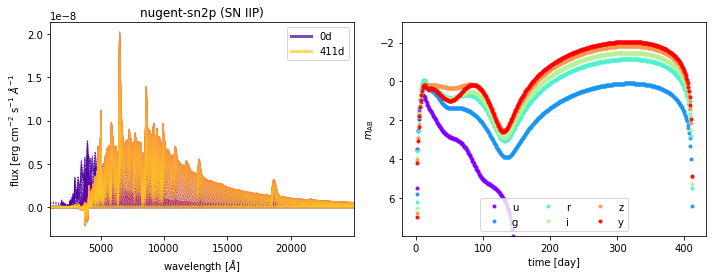

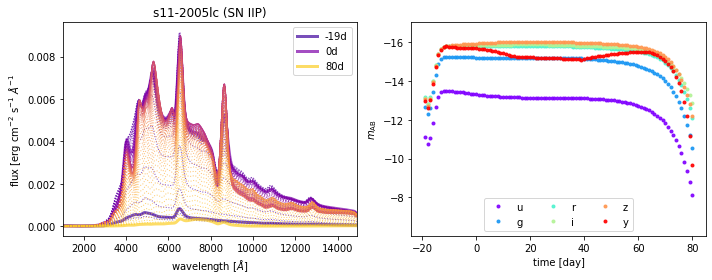

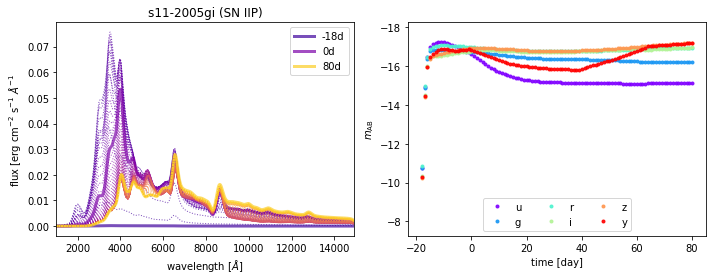

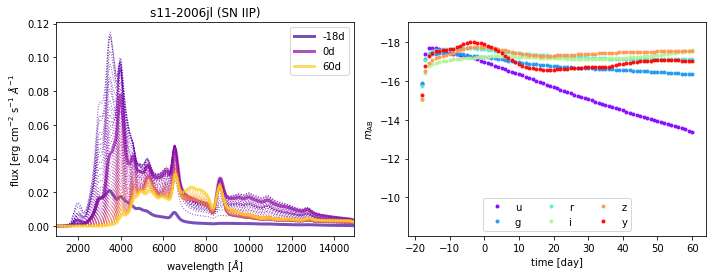

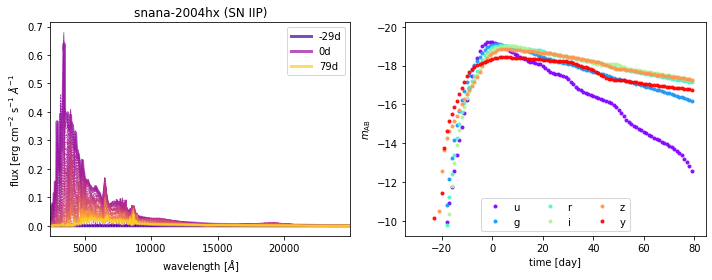

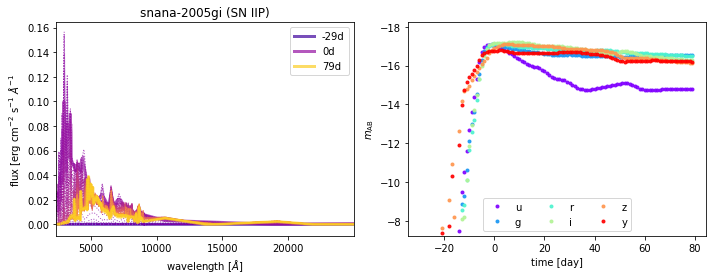

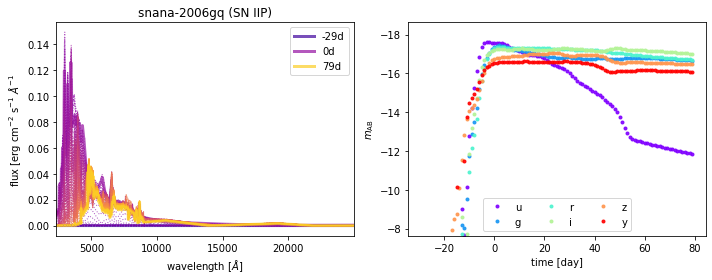

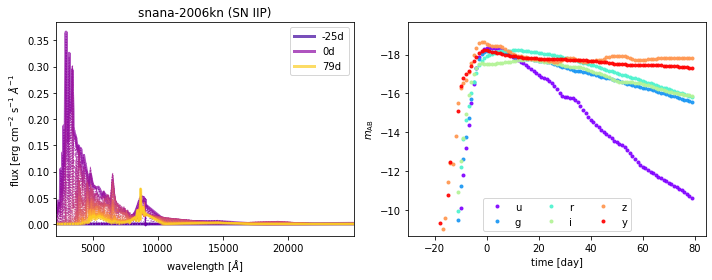

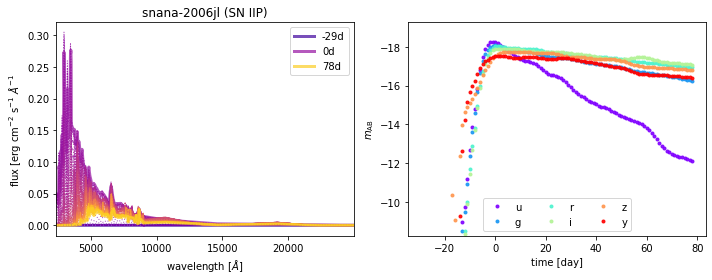

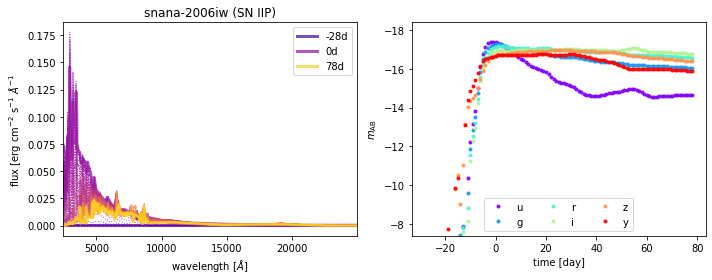

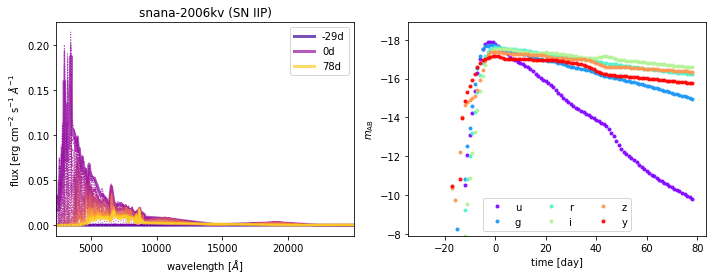

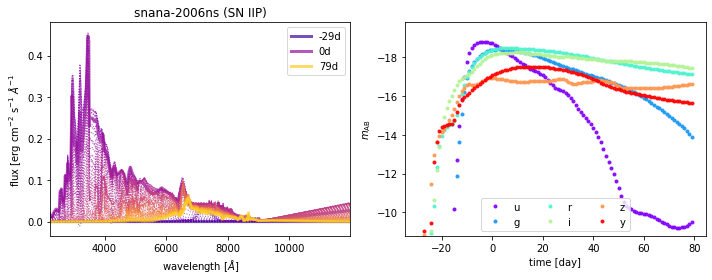

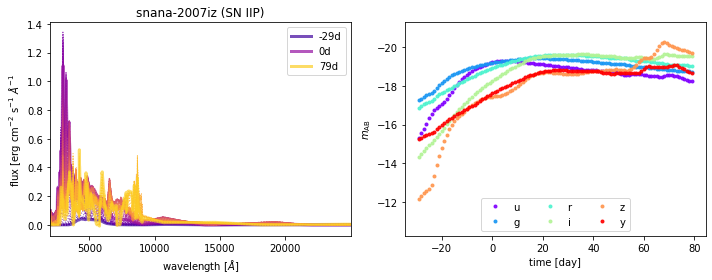

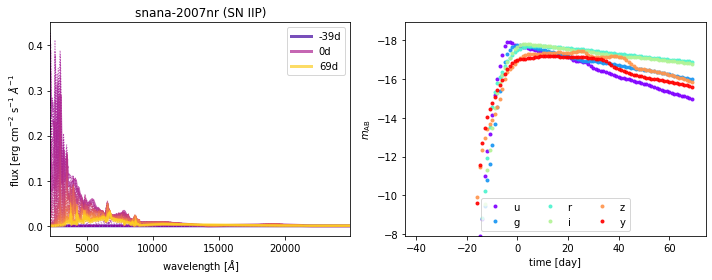

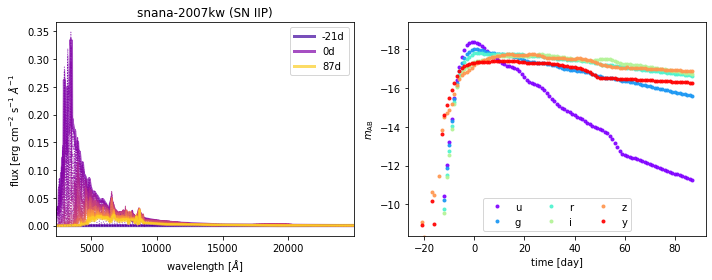

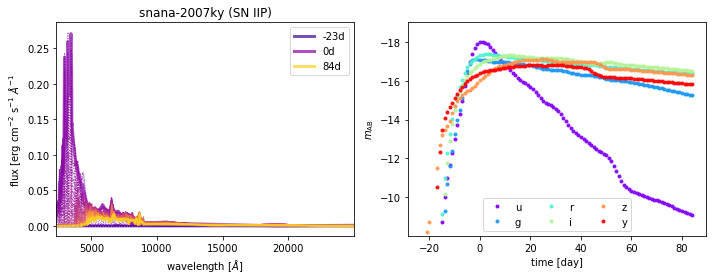

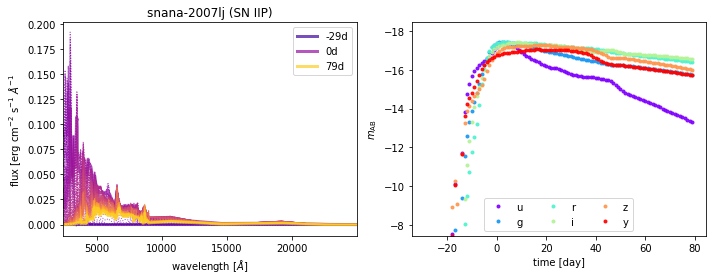

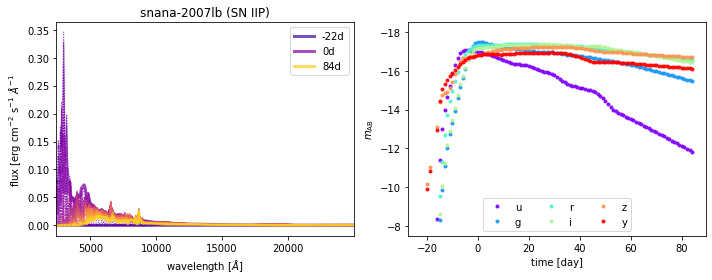

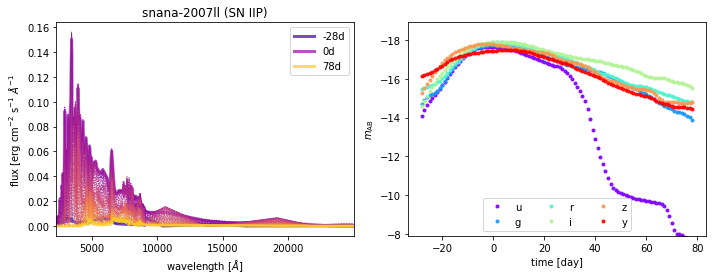

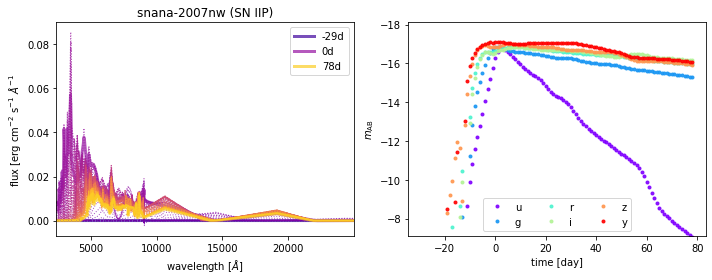

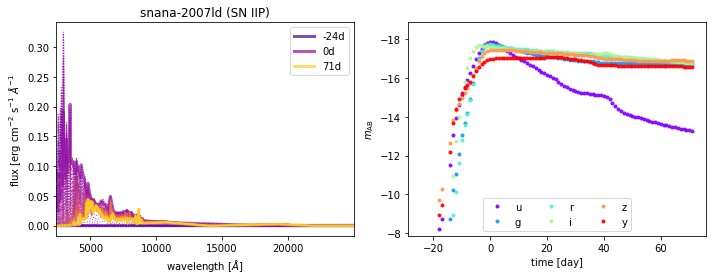

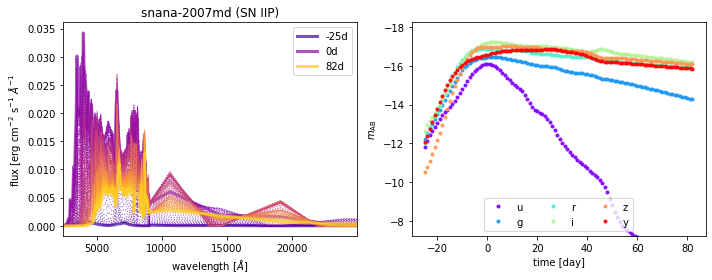

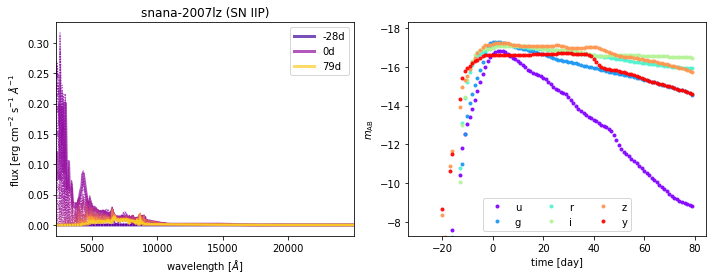

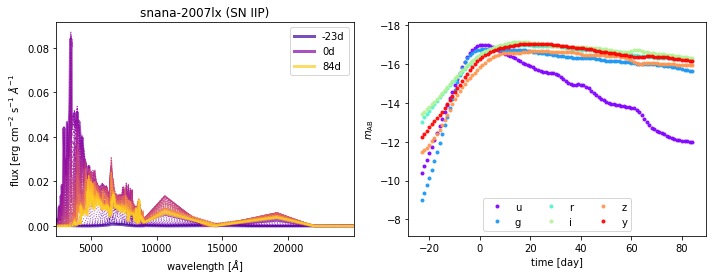

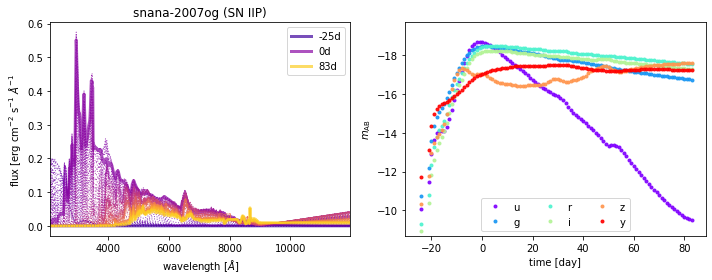

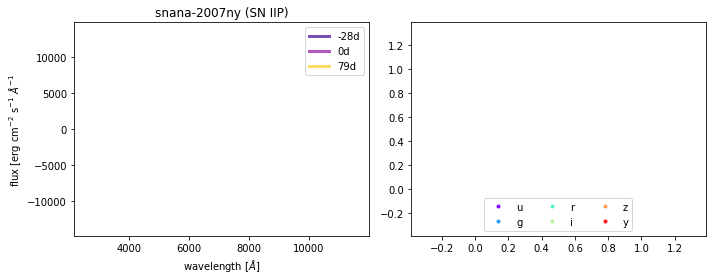

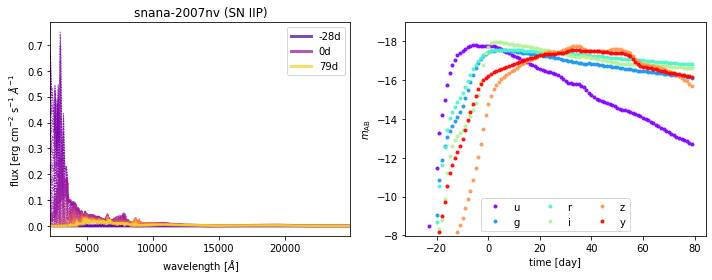

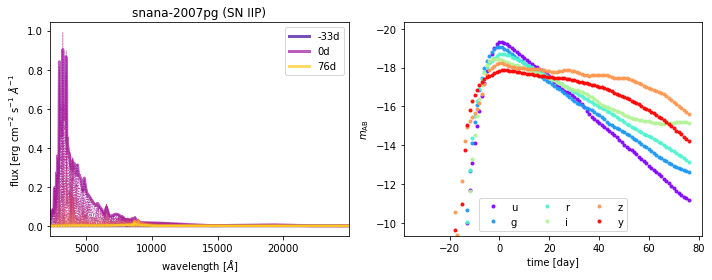

In [9]:
mask = source_tab['type'] == 'SN IIP'
models = source_tab[mask]['model']

for m in models:
    model = sncosmo.Model(m)
    row = np.argwhere(source_tab['model'] == m)[0,0]
    source_tab[row]['tmin'] = model.mintime()
    source_tab[row]['tmax'] = model.maxtime()
    source_tab[row]['wlmin'] = model.minwave()
    source_tab[row]['wlmax'] = model.maxwave()
    fig = plot_model(m, 'SN IIP')

## SN IIL Models

nugent-sn2l
u: tmax = 12.0d
g: tmax = 12.0d
r: tmax = 12.0d
i: tmax = 12.0d
z: tmax = 13.0d
y: tmax = 12.0d
minmag = -0.100647



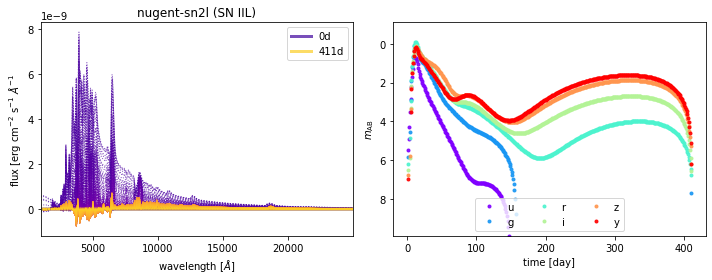

In [10]:
mask = source_tab['type'] == 'SN IIL'
models = source_tab[mask]['model']

for m in models:
    model = sncosmo.Model(m)
    row = np.argwhere(source_tab['model'] == m)[0,0]
    source_tab[row]['tmin'] = model.mintime()
    source_tab[row]['tmax'] = model.maxtime()
    source_tab[row]['wlmin'] = model.minwave()
    source_tab[row]['wlmax'] = model.maxwave()
    fig = plot_model(m, 'SN IIL')

## SN IIL/P Models

s11-2004hx
u: tmax = -9.0d
g: tmax = -5.0d
r: tmax = 0.0d
i: tmax = 4.0d
z: tmax = 6.0d
y: tmax = 3.0d
minmag = -19.0353



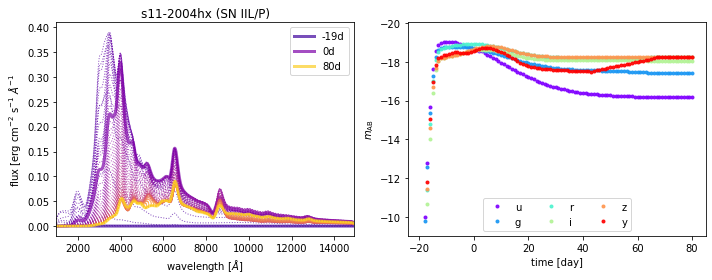

In [11]:
mask = source_tab['type'] == 'SN IIL/P'
models = source_tab[mask]['model']

for m in models:
    model = sncosmo.Model(m)
    row = np.argwhere(source_tab['model'] == m)[0,0]
    source_tab[row]['tmin'] = model.mintime()
    source_tab[row]['tmax'] = model.maxtime()
    source_tab[row]['wlmin'] = model.minwave()
    source_tab[row]['wlmax'] = model.maxwave()
    fig = plot_model(m, 'SN IIL/P')

## SN II-pec Models

snana-2007ms
u: tmax = -2.0d
g: tmax = 2.0d
r: tmax = 7.0d
i: tmax = 8.0d
z: tmax = 16.0d
y: tmax = 10.0d
minmag = -18.3077



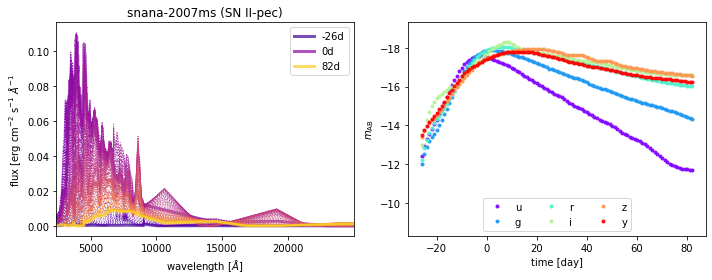

In [12]:
mask = source_tab['type'] == 'SN II-pec'
models = source_tab[mask]['model']

for m in models:
    model = sncosmo.Model(m)
    row = np.argwhere(source_tab['model'] == m)[0,0]
    source_tab[row]['tmin'] = model.mintime()
    source_tab[row]['tmax'] = model.maxtime()
    source_tab[row]['wlmin'] = model.minwave()
    source_tab[row]['wlmax'] = model.maxwave()
    fig = plot_model(m, 'SN II-pec')

## Pop III Models

whalen-z15b
u: tmax = 15.0d
g: tmax = 16.0d
r: tmax = 34.0d
i: tmax = 44.0d
z: tmax = 36.0d
y: tmax = 43.0d
minmag = -15.4834

whalen-z15d
u: tmax = 12.0d
g: tmax = 15.0d
r: tmax = 19.0d
i: tmax = 99.0d
z: tmax = 122.0d
y: tmax = 151.0d
minmag = -16.48

whalen-z15g
u: tmax = 14.0d
g: tmax = 21.0d
r: tmax = 87.0d
i: tmax = 88.0d
z: tmax = 94.0d
y: tmax = 94.0d
minmag = -17.1098

whalen-z25b
u: tmax = 7.0d
g: tmax = 5.0d
r: tmax = 12.0d
i: tmax = 17.0d
z: tmax = 25.0d
y: tmax = 27.0d
minmag = -13.905

whalen-z25d
u: tmax = 6.0d
g: tmax = 5.0d
r: tmax = 12.0d
i: tmax = 17.0d
z: tmax = 31.0d
y: tmax = 27.0d
minmag = -14.3985

whalen-z25g
u: tmax = 4.0d
g: tmax = 5.0d
r: tmax = 14.0d
i: tmax = 18.0d
z: tmax = 27.0d
y: tmax = 26.0d
minmag = -15.0427

whalen-z40b
u: tmax = 42.0d
g: tmax = 124.0d
r: tmax = 123.0d
i: tmax = 121.0d
z: tmax = 147.0d
y: tmax = 147.0d
minmag = -17.7214

whalen-z40g
u: tmax = 96.0d
g: tmax = 96.0d
r: tmax = 133.0d
i: tmax = 154.0d
z: tmax = 184.0d
y: tmax = 150.0d
m

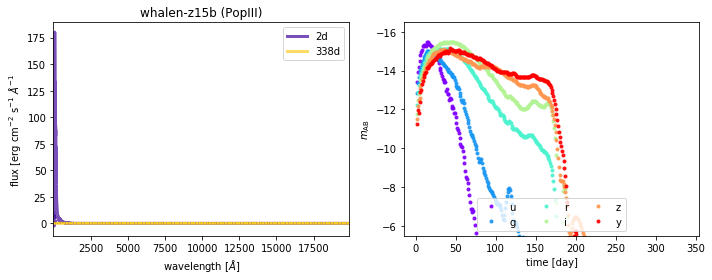

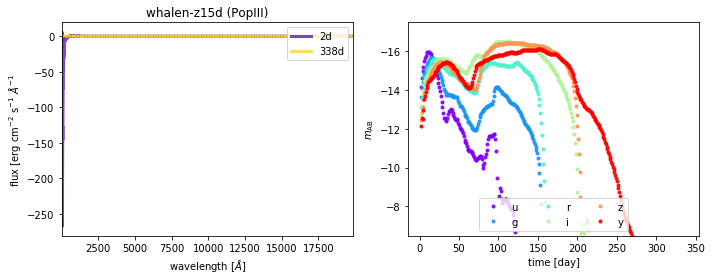

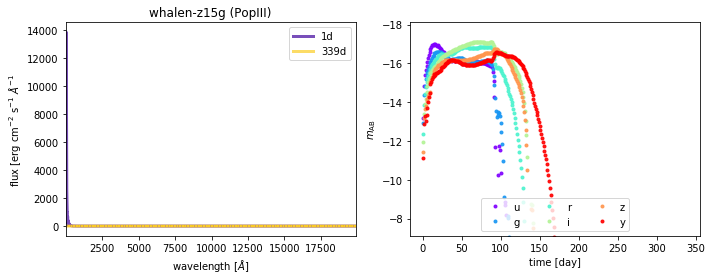

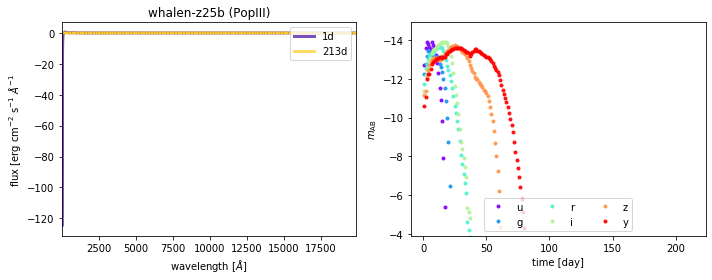

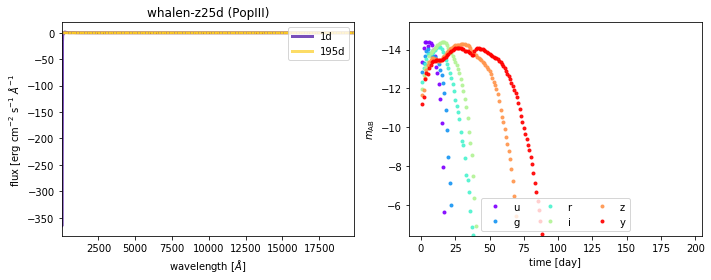

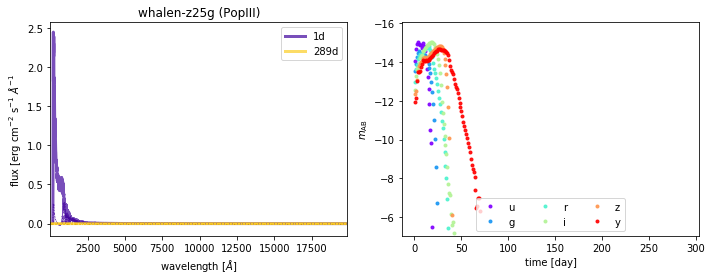

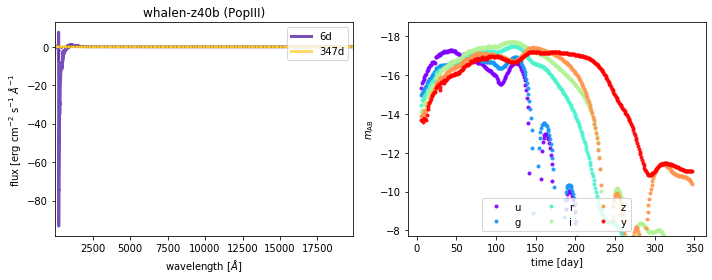

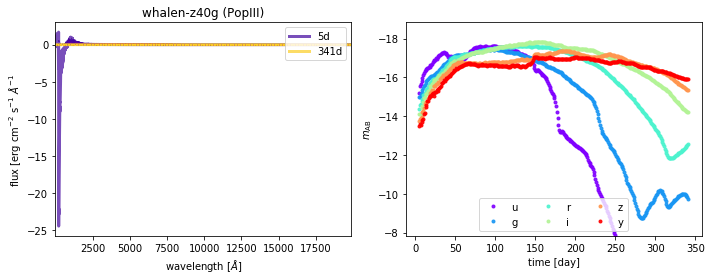

In [13]:
mask = source_tab['type'] == 'PopIII'
models = source_tab[mask]['model']

for m in models:
    model = sncosmo.Model(m)
    row = np.argwhere(source_tab['model'] == m)[0,0]
    source_tab[row]['tmin'] = model.mintime()
    source_tab[row]['tmax'] = model.maxtime()
    source_tab[row]['wlmin'] = model.minwave()
    source_tab[row]['wlmax'] = model.maxwave()
    fig = plot_model(m, 'PopIII')

In [14]:
source_tab

<Table length=76>
  type   ...
  str9   ...
-------- ...
   SN Ia ...
   SN Ia ...
   SN Ia ...
 SN Ib/c ...
 SN Ib/c ...
  SN IIP ...
  SN IIL ...
  SN IIn ...
SN IIL/P ...
  SN IIP ...
     ... ...
  PopIII ...
  PopIII ...
  PopIII ...
  PopIII ...
  PopIII ...
  PopIII ...
   SN Ia ...
   SN Ia ...
   SN Ia ...
   SN Ia ...